In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from sklearn.metrics import mean_absolute_error,mean_squared_error, explained_variance_score
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
# import the data
houseprice_dataset = pd.read_csv('../DATA/kc_house_data.csv')

In [9]:
houseprice_dataset.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [10]:
houseprice_dataset.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  21597.000000   
mean   1.509941e+04      1.494096      0.007547      0.234292      3.409825   
std    4.141264e+04      0.539683      0.086549      0.766390      0.650546   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068500e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21597.000000  21597.000000   21597.000000  21597.000000  21597.000000   
mean       7.657915   1788.596842     291.725008   1970.999676     84.464787   
std        1.173200    827.759761     442.667800     29.375234    401.821438   
min        3.000000    370.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000  21597.000000   21597.000000   21597.000000  
mean   98077.951845     47.560093   -122.213982    1986.620318   12758.283512  
std       53.513072      0.138552      0.140724     685.230472   27274.441950  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471100   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.231000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [8]:
# lets check for null values
houseprice_dataset.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

<AxesSubplot:>

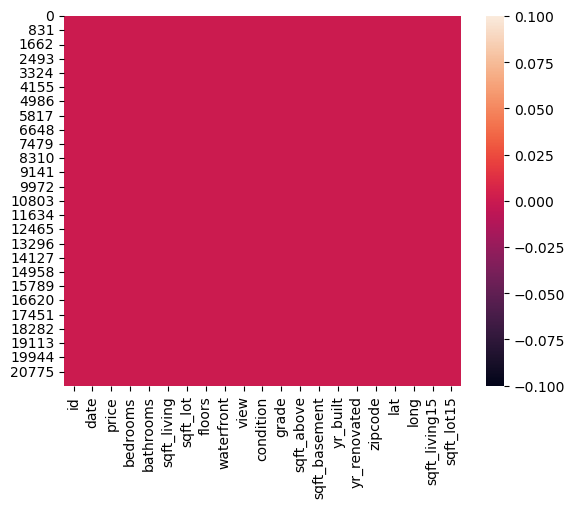

In [7]:
sns.heatmap(data=houseprice_dataset.isnull())

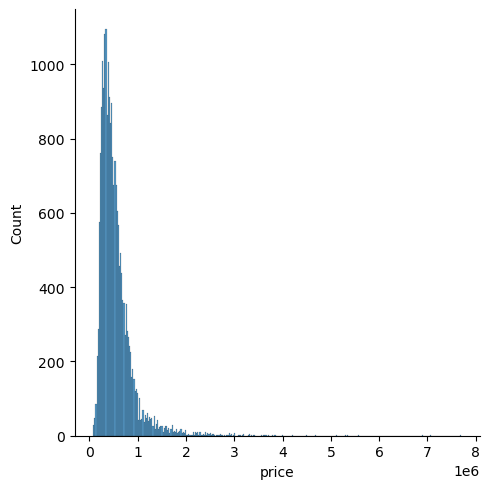

In [11]:
sns.displot(houseprice_dataset['price'])

C:\Users\Papak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

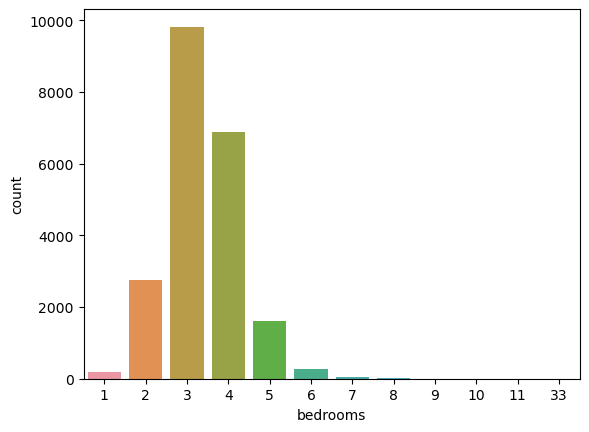

In [12]:
sns.countplot(houseprice_dataset['bedrooms'])

In [14]:
houseprice_dataset.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

In [ ]:
# it seems that the sqft_living seems to be the hieghest corrlilating feature in this dataset

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

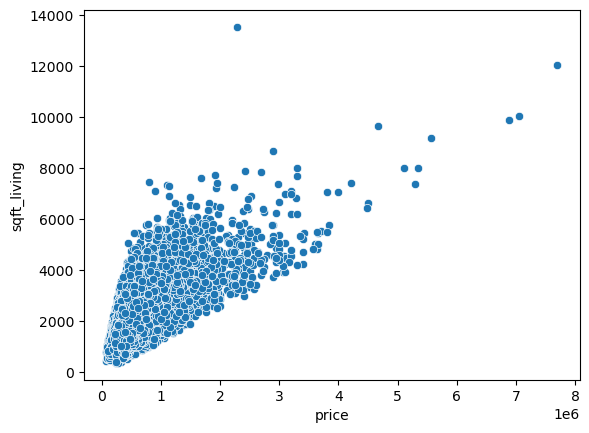

In [15]:
sns.scatterplot(x=houseprice_dataset['price'], y=houseprice_dataset['sqft_living'])

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

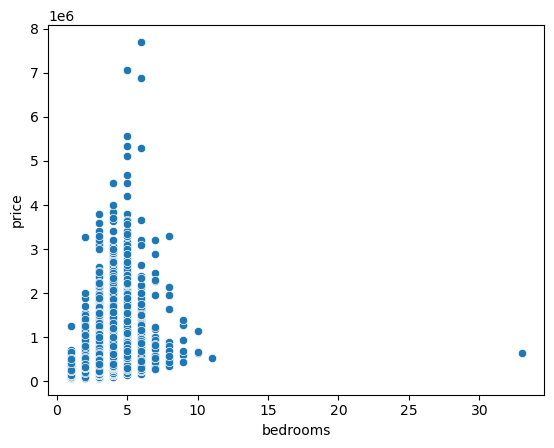

In [20]:
sns.scatterplot(x=houseprice_dataset['bedrooms'], y=houseprice_dataset['price'])

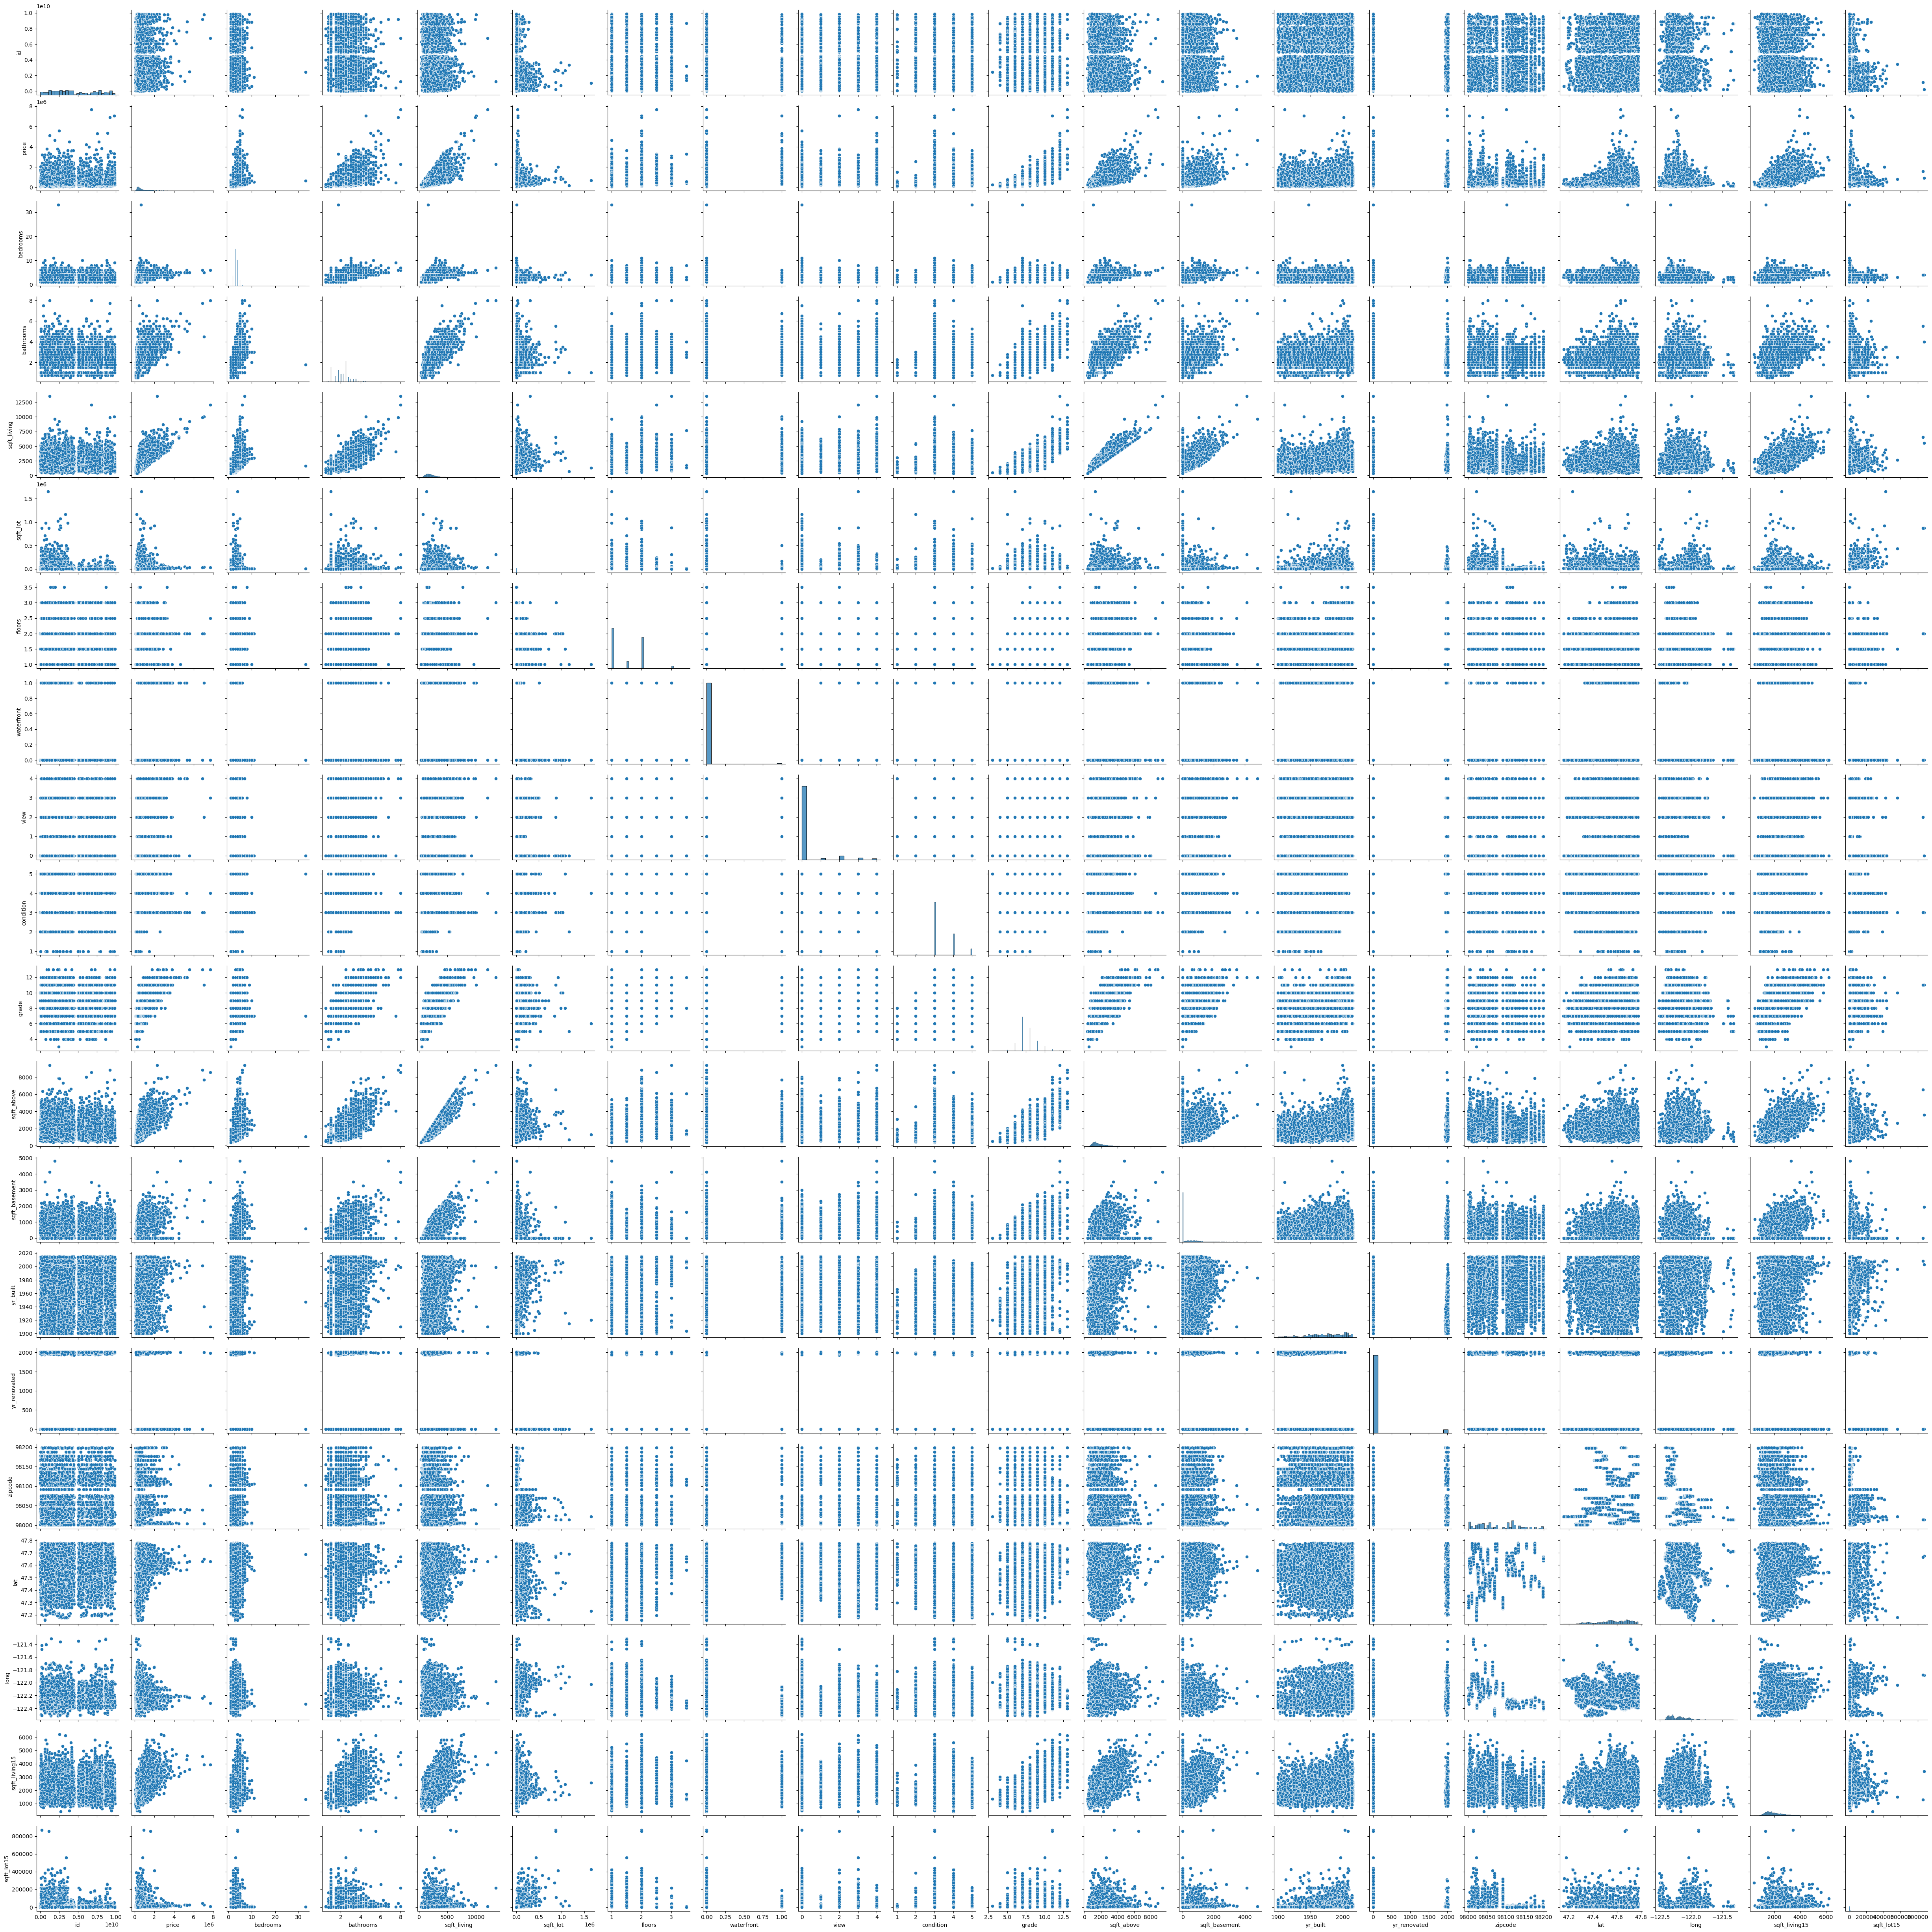

In [16]:
sns.pairplot(houseprice_dataset)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

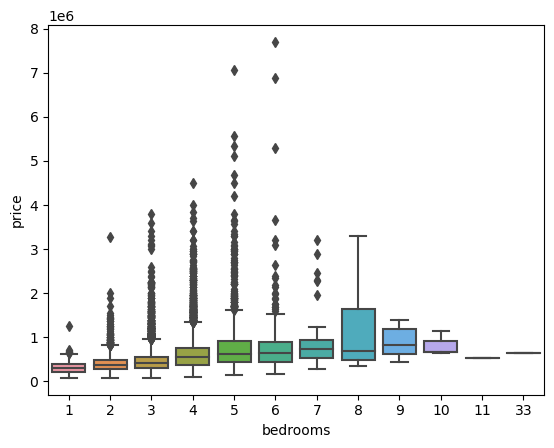

In [18]:
sns.boxplot(x='bedrooms', y='price', data=houseprice_dataset)

<AxesSubplot:xlabel='price', ylabel='long'>

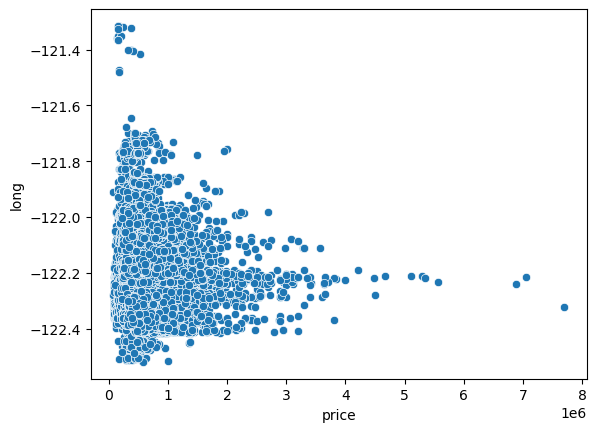

In [21]:
sns.scatterplot(x='price', y='long', data=houseprice_dataset)

<AxesSubplot:xlabel='price', ylabel='lat'>

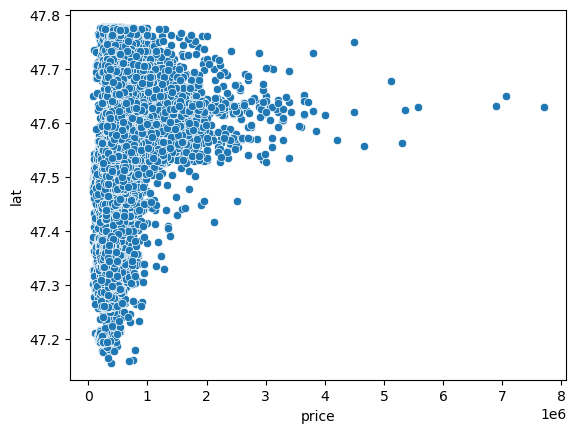

In [22]:
sns.scatterplot(x='price', y='lat', data=houseprice_dataset)

<AxesSubplot:xlabel='long', ylabel='lat'>

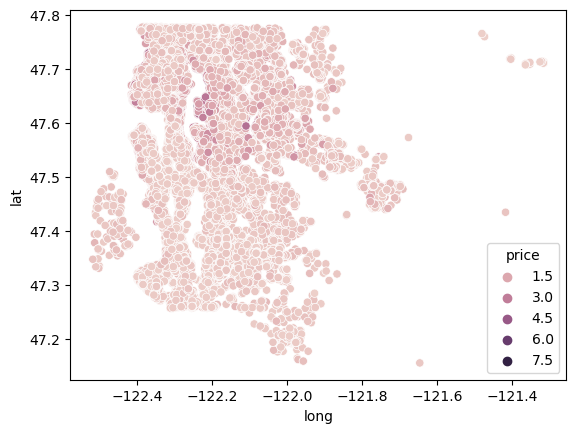

In [24]:
sns.scatterplot(x='long', y='lat', data=houseprice_dataset, hue='price')

In [ ]:
# we can drop some out lyers

In [25]:
houseprice_dataset.sort_values('price', ascending=False).head(20)

id        date      price  bedrooms  bathrooms  sqft_living  \
7245   6762700020  10/13/2014  7700000.0         6       8.00        12050   
3910   9808700762   6/11/2014  7060000.0         5       4.50        10040   
9245   9208900037   9/19/2014  6890000.0         6       7.75         9890   
4407   2470100110    8/4/2014  5570000.0         5       5.75         9200   
1446   8907500070   4/13/2015  5350000.0         5       5.00         8000   
1313   7558700030   4/13/2015  5300000.0         6       6.00         7390   
1162   1247600105  10/20/2014  5110000.0         5       5.25         8010   
8085   1924059029   6/17/2014  4670000.0         5       6.75         9640   
2624   7738500731   8/15/2014  4500000.0         5       5.50         6640   
8629   3835500195   6/18/2014  4490000.0         4       3.00         6430   
12358  6065300370    5/6/2015  4210000.0         5       6.00         7440   
4145   6447300265  10/14/2014  4000000.0         4       5.50         7080   
2083   8106100105  11/14/2014  3850000.0         4       4.25         5770   
7028    853200010    7/1/2014  3800000.0         5       5.50         7050   
19002  2303900100   9/11/2014  3800000.0         3       4.25         5510   
16288  7397300170   5/30/2014  3710000.0         4       3.50         5550   
18467  4389201095   5/11/2015  3650000.0         5       3.75         5020   
6502   4217402115   4/21/2015  3650000.0         6       4.75         5480   
15241  2425049063   9/11/2014  3640000.0         4       3.25         4830   
19133  3625049042  10/11/2014  3640000.0         5       6.00         5490   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
7245      27600     2.5           0     3  ...     13        8570   
3910      37325     2.0           1     2  ...     11        7680   
9245      31374     2.0           0     4  ...     13        8860   
4407      35069     2.0           0     0  ...     13        6200   
1446      23985     2.0           0     4  ...     12        6720   
1313      24829     2.0           1     4  ...     12        5000   
1162      45517     2.0           1     4  ...     12        5990   
8085      13068     1.0           1     4  ...     12        4820   
2624      40014     2.0           1     4  ...     12        6350   
8629      27517     2.0           0     0  ...     12        6430   
12358     21540     2.0           0     0  ...     12        5550   
4145      16573     2.0           0     0  ...     12        5760   
2083      21300     2.0           1     4  ...     11        5770   
7028      42840     1.0           0     2  ...     13        4320   
19002     35000     2.0           0     4  ...     13        4910   
16288     28078     2.0           0     2  ...     12        3350   
18467      8694     2.0           0     1  ...     12        3970   
6502      19401     1.5           1     4  ...     11        3910   
15241     22257     2.0           1     4  ...     11        4830   
19133     19897     2.0           0     0  ...     12        5490   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
7245            3480      1910          1987    98102  47.6298 -122.323   
3910            2360      1940          2001    98004  47.6500 -122.214   
9245            1030      2001             0    98039  47.6305 -122.240   
4407            3000      2001             0    98039  47.6289 -122.233   
1446            1280      2009             0    98004  47.6232 -122.220   
1313            2390      1991             0    98040  47.5631 -122.210   
1162            2020      1999             0    98033  47.6767 -122.211   
8085            4820      1983          2009    98040  47.5570 -122.210   
2624             290      2004             0    98155  47.7493 -122.280   
8629               0      2001             0    98004  47.6208 -122.219   
12358           1890      2003             0    98006  47.5692 -122.189   
4145            1320      

In [26]:
houseprice_dataset_without_top_1_perc = houseprice_dataset.sort_values('price', ascending=True).iloc[216:]

<AxesSubplot:xlabel='long', ylabel='lat'>

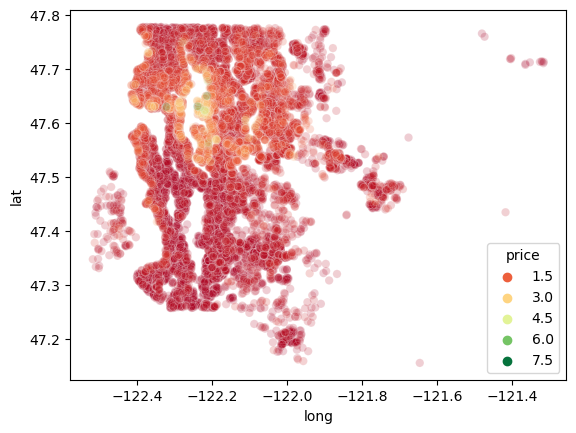

In [29]:
sns.scatterplot(x='long', y='lat', data=houseprice_dataset_without_top_1_perc,alpha=0.2, hue='price', palette='RdYlGn')

<AxesSubplot:xlabel='waterfront', ylabel='price'>

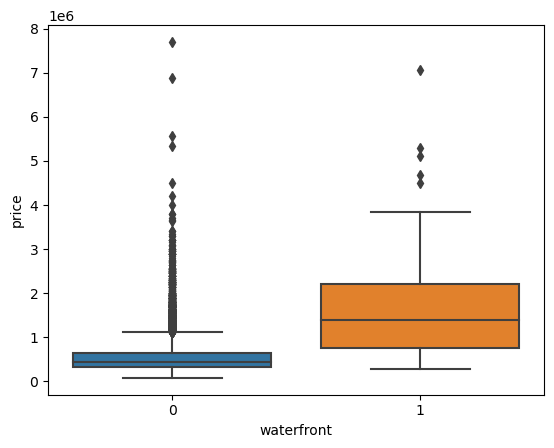

In [30]:
sns.boxplot(x='waterfront', y='price', data=houseprice_dataset)

In [34]:
houseprice_dataset = houseprice_dataset.drop('id', axis=1)

In [36]:
houseprice_dataset['date'] = pd.to_datetime(houseprice_dataset['date'])

In [37]:
houseprice_dataset['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [38]:
houseprice_dataset['year'] = houseprice_dataset['date'].apply(lambda date: date.year)
houseprice_dataset['month'] = houseprice_dataset['date'].apply(lambda date: date.month)

In [39]:
houseprice_dataset.head()

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0 2014-10-13  221900.0         3       1.00         1180      5650     1.0   
1 2014-12-09  538000.0         3       2.25         2570      7242     2.0   
2 2015-02-25  180000.0         2       1.00          770     10000     1.0   
3 2014-12-09  604000.0         4       3.00         1960      5000     1.0   
4 2015-02-18  510000.0         3       2.00         1680      8080     1.0   

   waterfront  view  condition  ...  sqft_basement  yr_built  yr_renovated  \
0           0     0          3  ...              0      1955             0   
1           0     0          3  ...            400      1951          1991   
2           0     0          3  ...              0      1933             0   
3           0     0          5  ...            910      1965             0   
4           0     0          3  ...              0      1987             0   

   zipcode      lat     long  sqft_living15  sqft_lot15  year  month  
0    98178  47.5112 -122.257           1340        5650  2014     10  
1    98125  47.7210 -122.319           1690        7639  2014     12  
2    98028  47.7379 -122.233           2720        8062  2015      2  
3    98136  47.5208 -122.393           1360        5000  2014     12  
4    98074  47.6168 -122.045           1800        7503  2015      2  

[5 rows x 22 columns]

<AxesSubplot:xlabel='month', ylabel='price'>

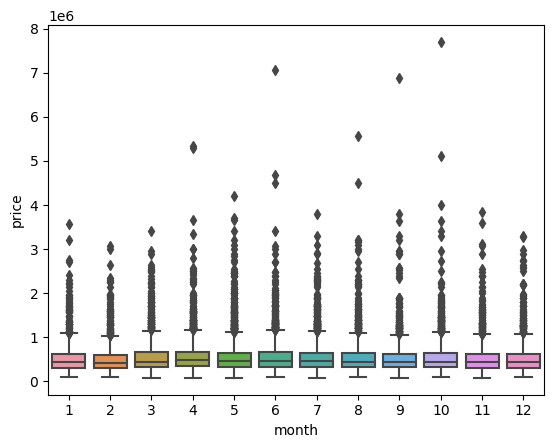

In [53]:
sns.boxplot(x='month', y='price', data=houseprice_dataset)

<AxesSubplot:xlabel='month'>

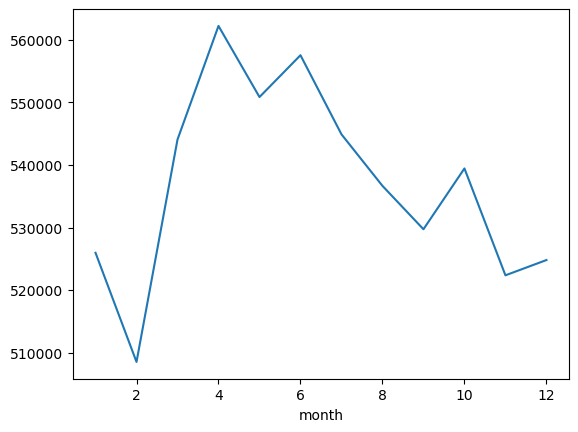

In [54]:
houseprice_dataset.groupby('month').mean()['price'].plot()

In [55]:
houseprice_dataset.head()

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0 2014-10-13  221900.0         3       1.00         1180      5650     1.0   
1 2014-12-09  538000.0         3       2.25         2570      7242     2.0   
2 2015-02-25  180000.0         2       1.00          770     10000     1.0   
3 2014-12-09  604000.0         4       3.00         1960      5000     1.0   
4 2015-02-18  510000.0         3       2.00         1680      8080     1.0   

   waterfront  view  condition  ...  sqft_basement  yr_built  yr_renovated  \
0           0     0          3  ...              0      1955             0   
1           0     0          3  ...            400      1951          1991   
2           0     0          3  ...              0      1933             0   
3           0     0          5  ...            910      1965             0   
4           0     0          3  ...              0      1987             0   

   zipcode      lat     long  sqft_living15  sqft_lot15  year  month  
0    98178  47.5112 -122.257           1340        5650  2014     10  
1    98125  47.7210 -122.319           1690        7639  2014     12  
2    98028  47.7379 -122.233           2720        8062  2015      2  
3    98136  47.5208 -122.393           1360        5000  2014     12  
4    98074  47.6168 -122.045           1800        7503  2015      2  

[5 rows x 22 columns]

In [56]:
houseprice_dataset.drop('date', axis=1, inplace=True)

In [58]:
houseprice_dataset.drop('zipcode', axis=1, inplace=True)

In [59]:
houseprice_dataset.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180              0      1955             0   
1     0          3      7        2170            400      1951          1991   
2     0          3      6         770              0      1933             0   
3     0          5      7        1050            910      1965             0   
4     0          3      8        1680              0      1987             0   

       lat     long  sqft_living15  sqft_lot15  year  month  
0  47.5112 -122.257           1340        5650  2014     10  
1  47.7210 -122.319           1690        7639  2014     12  
2  47.7379 -122.233           2720        8062  2015      2  
3  47.5208 -122.393           1360        5000  2014     12  
4  47.6168 -122.045           1800        7503  2015      2

In [ ]:
# perform train test split

In [60]:
houseprice_dataset.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')

In [62]:
X = houseprice_dataset.drop('price', axis=1).values
y = houseprice_dataset['price'].values

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [ ]:
# perform scaling

In [68]:
scaled_housing_dataset = MinMaxScaler()

In [69]:
X_train = scaled_housing_dataset.fit_transform(X_train)
X_test = scaled_housing_dataset.transform(X_test)

In [ ]:
# build the neural network

In [72]:
housing_Prediction_Model = Sequential()

housing_Prediction_Model.add(Dense(19,activation='relu'))
housing_Prediction_Model.add(Dense(19,activation='relu'))
housing_Prediction_Model.add(Dense(19,activation='relu'))
housing_Prediction_Model.add(Dense(19,activation='relu'))
housing_Prediction_Model.add(Dense(1))

housing_Prediction_Model.compile(optimizer='adam', loss='mse')

In [73]:
housing_Prediction_Model.fit(X_train, y_train, 
                             validation_data=(X_test, y_test),
                            batch_size=128, epochs=400)

Epoch 1/400
119/119 [==============================] - 1s 5ms/step - loss: 430244921344.0000 - val_loss: 418941042688.0000
Epoch 2/400
119/119 [==============================] - 0s 2ms/step - loss: 429434339328.0000 - val_loss: 416050184192.0000
Epoch 3/400
119/119 [==============================] - 0s 2ms/step - loss: 417488273408.0000 - val_loss: 388574937088.0000
Epoch 4/400
119/119 [==============================] - 0s 2ms/step - loss: 357178834944.0000 - val_loss: 288263798784.0000
Epoch 5/400
119/119 [==============================] - 0s 2ms/step - loss: 220959277056.0000 - val_loss: 141243006976.0000
Epoch 6/400
119/119 [==============================] - 0s 2ms/step - loss: 114836340736.0000 - val_loss: 96103424000.0000
Epoch 7/400
119/119 [==============================] - 0s 2ms/step - loss: 97993261056.0000 - val_loss: 94035550208.0000
Epoch 8/400
119/119 [==============================] - 0s 2ms/step - loss: 96338739200.0000 - val_loss: 92623634432.0000
Epoch 9/400
119/119 [

119/119 [==============================] - 0s 2ms/step - loss: 39759851520.0000 - val_loss: 38535778304.0000
Epoch 69/400
119/119 [==============================] - 0s 2ms/step - loss: 39519825920.0000 - val_loss: 38320558080.0000
Epoch 70/400
119/119 [==============================] - 0s 2ms/step - loss: 39297896448.0000 - val_loss: 38102712320.0000
Epoch 71/400
119/119 [==============================] - 0s 2ms/step - loss: 39079792640.0000 - val_loss: 37855145984.0000
Epoch 72/400
119/119 [==============================] - 0s 2ms/step - loss: 38882426880.0000 - val_loss: 37621944320.0000
Epoch 73/400
119/119 [==============================] - 0s 2ms/step - loss: 38654853120.0000 - val_loss: 37412040704.0000
Epoch 74/400
119/119 [==============================] - 0s 2ms/step - loss: 38456721408.0000 - val_loss: 37193289728.0000
Epoch 75/400
119/119 [==============================] - 0s 2ms/step - loss: 38239776768.0000 - val_loss: 37099270144.0000
Epoch 76/400
119/119 [===============

Epoch 135/400
119/119 [==============================] - 0s 2ms/step - loss: 33162606592.0000 - val_loss: 31949461504.0000
Epoch 136/400
119/119 [==============================] - 0s 2ms/step - loss: 33210302464.0000 - val_loss: 31708235776.0000
Epoch 137/400
119/119 [==============================] - 0s 2ms/step - loss: 33143347200.0000 - val_loss: 31658326016.0000
Epoch 138/400
119/119 [==============================] - 0s 2ms/step - loss: 33117022208.0000 - val_loss: 31721285632.0000
Epoch 139/400
119/119 [==============================] - 0s 2ms/step - loss: 33089792000.0000 - val_loss: 31596152832.0000
Epoch 140/400
119/119 [==============================] - 0s 2ms/step - loss: 33100124160.0000 - val_loss: 31534563328.0000
Epoch 141/400
119/119 [==============================] - 0s 2ms/step - loss: 33051957248.0000 - val_loss: 31498098688.0000
Epoch 142/400
119/119 [==============================] - 0s 2ms/step - loss: 32993134592.0000 - val_loss: 31461212160.0000
Epoch 143/400
11

119/119 [==============================] - 0s 2ms/step - loss: 31757725696.0000 - val_loss: 29950820352.0000
Epoch 202/400
119/119 [==============================] - 0s 2ms/step - loss: 31793719296.0000 - val_loss: 29964146688.0000
Epoch 203/400
119/119 [==============================] - 0s 2ms/step - loss: 31706810368.0000 - val_loss: 29914583040.0000
Epoch 204/400
119/119 [==============================] - 0s 2ms/step - loss: 31648679936.0000 - val_loss: 29952278528.0000
Epoch 205/400
119/119 [==============================] - 0s 2ms/step - loss: 31692169216.0000 - val_loss: 29892884480.0000
Epoch 206/400
119/119 [==============================] - 0s 2ms/step - loss: 31660556288.0000 - val_loss: 29858836480.0000
Epoch 207/400
119/119 [==============================] - 0s 2ms/step - loss: 31619938304.0000 - val_loss: 29976492032.0000
Epoch 208/400
119/119 [==============================] - 0s 2ms/step - loss: 31681349632.0000 - val_loss: 29854019584.0000
Epoch 209/400
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 30893543424.0000 - val_loss: 28927088640.0000
Epoch 268/400
119/119 [==============================] - 0s 2ms/step - loss: 30853332992.0000 - val_loss: 28930125824.0000
Epoch 269/400
119/119 [==============================] - 0s 2ms/step - loss: 30904524800.0000 - val_loss: 28923947008.0000
Epoch 270/400
119/119 [==============================] - 0s 2ms/step - loss: 30850768896.0000 - val_loss: 28921528320.0000
Epoch 271/400
119/119 [==============================] - 0s 2ms/step - loss: 30830362624.0000 - val_loss: 28893216768.0000
Epoch 272/400
119/119 [==============================] - 0s 2ms/step - loss: 30808778752.0000 - val_loss: 28946325504.0000
Epoch 273/400
119/119 [==============================] - 0s 3ms/step - loss: 30827245568.0000 - val_loss: 28893147136.0000
Epoch 274/400
119/119 [==============================] - 0s 2ms/step - loss: 30801209344.0000 - val_loss: 28915087360.0000
Epoch 275/400
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 30234415104.0000 - val_loss: 28132352000.0000
Epoch 334/400
119/119 [==============================] - 0s 2ms/step - loss: 30233212928.0000 - val_loss: 28108138496.0000
Epoch 335/400
119/119 [==============================] - 0s 2ms/step - loss: 30234982400.0000 - val_loss: 28091604992.0000
Epoch 336/400
119/119 [==============================] - 0s 2ms/step - loss: 30202671104.0000 - val_loss: 28101457920.0000
Epoch 337/400
119/119 [==============================] - 0s 2ms/step - loss: 30407497728.0000 - val_loss: 28096231424.0000
Epoch 338/400
119/119 [==============================] - 0s 2ms/step - loss: 30226122752.0000 - val_loss: 28164341760.0000
Epoch 339/400
119/119 [==============================] - 0s 2ms/step - loss: 30182057984.0000 - val_loss: 28070221824.0000
Epoch 340/400
119/119 [==============================] - 0s 2ms/step - loss: 30187995136.0000 - val_loss: 28072208384.0000
Epoch 341/400
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 29722052608.0000 - val_loss: 27478423552.0000
Epoch 400/400
119/119 [==============================] - 0s 2ms/step - loss: 29717133312.0000 - val_loss: 27452153856.0000


In [75]:
pd.DataFrame(housing_Prediction_Model.history.history)

loss      val_loss
0    4.302449e+11  4.189410e+11
1    4.294343e+11  4.160502e+11
2    4.174883e+11  3.885749e+11
3    3.571788e+11  2.882638e+11
4    2.209593e+11  1.412430e+11
..            ...           ...
395  2.974435e+10  2.754536e+10
396  2.974091e+10  2.752967e+10
397  2.976149e+10  2.753961e+10
398  2.972205e+10  2.747842e+10
399  2.971713e+10  2.745215e+10

[400 rows x 2 columns]

In [76]:
losses_of_model = pd.DataFrame(housing_Prediction_Model.history.history)

<AxesSubplot:>

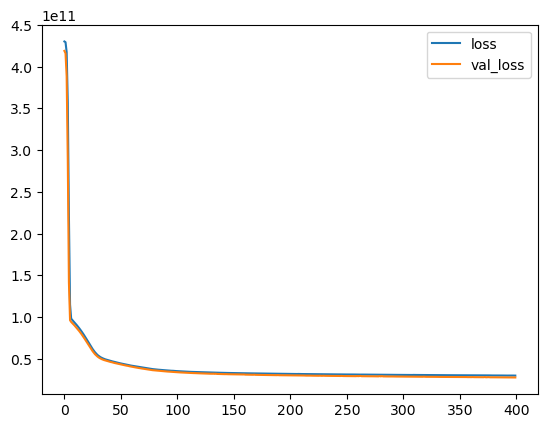

In [77]:
losses_of_model.plot()

In [80]:
predictions_of_house_model = housing_Prediction_Model.predict(X_test)

203/203 [==============================] - 0s 1ms/step


In [81]:
np.sqrt(mean_squared_error(y_test, predictions_of_house_model))

165686.92780988954

In [82]:
explained_variance_score(y_test, predictions_of_house_model)

0.7930812405950394

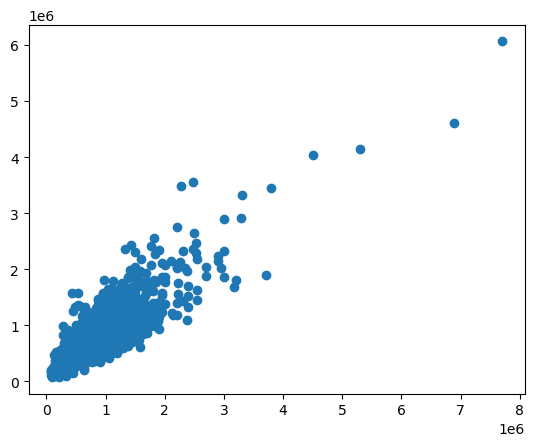

In [83]:
plt.scatter(y_test, predictions_of_house_model)